In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

from copy import copy as copy

import os
import sys

import pprint

from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
PLOT = True
NUM_OF_CLASS = 10
VERBOSE = True

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

import keras.utils

In [4]:
# The data, split between train and test sets:
(Input_train, Objetive_train), (Input_test, Objetive_test) = mnist.load_data()

Input_train = Input_train.reshape(tuple(list(Input_train.shape) + [1]))
Input_test = Input_test.reshape(tuple(list(Input_test.shape) + [1]))

print('Input_train shape:', Input_train.shape)
print(Input_train.shape[0], 'train samples')
print(Input_test.shape[0], 'test samples')

Input_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [5]:
# Convert class vectors to binary class matrices.
Objetive_train = keras.utils.to_categorical(Objetive_train, NUM_OF_CLASS)
Objetive_test = keras.utils.to_categorical(Objetive_test, NUM_OF_CLASS)

In [6]:
#Architecture
def createModel(input_shape, nClasses):
    model = Sequential()
    
    model.add(Conv2D(20, (2, 2), padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(10, (2, 2), activation='selu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))
    
#     model.add(Conv2D(48, (2, 2), padding='same', activation='selu'))
#     model.add(Conv2D(48, (4, 4), activation='relu'))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Dropout(0.3))
    
#     model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
#     model.add(Conv2D(64, (3, 3), activation='selu'))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Dropout(0.3))
 
    model.add(Flatten())
#     model.add(Dense(500, activation='selu'))
#     model.add(Dropout(0.8))
#     model.add(Dense(300, activation='relu'))
#     model.add(Dropout(0.4))
    model.add(Dense(nClasses, activation='softmax'))
     
    return model

In [7]:
## Train Parameters

epochs = 50
batch_size = 1000

###

output_model = createModel(Input_train.shape[1:], NUM_OF_CLASS)
output_model.compile(optimizer='adadelta', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
output_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 20)        100       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 27, 27, 10)        810       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 10)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 10)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1690)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                16910     
Total params: 17,820
Trainable params: 17,820
Non-trainable params: 0
_________________________________________________________________


In [9]:
history = output_model.fit(Input_train, Objetive_train, batch_size=batch_size, epochs=epochs, verbose=VERBOSE, 
                       validation_data=(Input_test, Objetive_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 26s 438us/step - loss: 4.2532 - acc: 0.6919 - val_loss: 1.5445 - val_acc: 0.8842
Epoch 2/50
60000/60000 [==============================] - 26s 425us/step - loss: 1.5953 - acc: 0.8811 - val_loss: 0.9156 - val_acc: 0.9301
Epoch 3/50
60000/60000 [==============================] - 25s 423us/step - loss: 1.1133 - acc: 0.9132 - val_loss: 0.6647 - val_acc: 0.9465
Epoch 4/50
60000/60000 [==============================] - 96s 2ms/step - loss: 0.8178 - acc: 0.9316 - val_loss: 0.5367 - val_acc: 0.9531
Epoch 5/50
60000/60000 [==============================] - 54s 907us/step - loss: 0.6286 - acc: 0.9433 - val_loss: 0.3989 - val_acc: 0.9600
Epoch 6/50
60000/60000 [==============================] - 69s 1ms/step - loss: 0.4809 - acc: 0.9503 - val_loss: 0.3045 - val_acc: 0.9658
Epoch 7/50
60000/60000 [==============================] - 149s 2ms/step - loss: 0.3610 - acc: 0.9543 - val_loss: 0.2249 

In [10]:
output_model.evaluate(Input_test, Objetive_test)

10000/10000 [==============================] - 4s 366us/step


[0.08109750577758577, 0.9838]

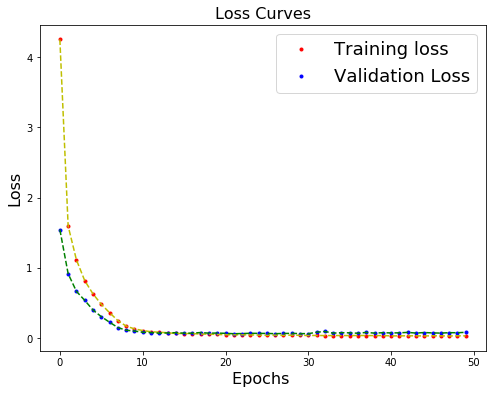

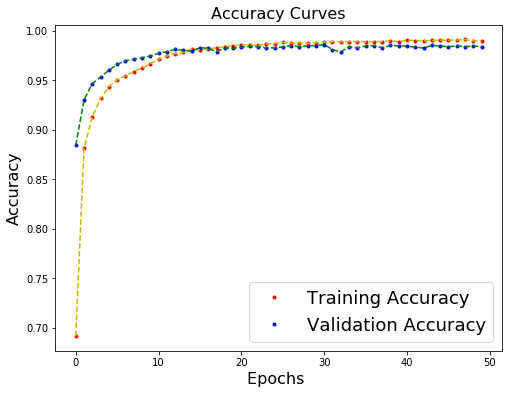

In [11]:
if PLOT:
    ## Plots
    # Loss Curves
    plt.figure(figsize=[8,6])
    plt.plot(history.history['loss'],'.r')
    plt.plot(history.history['val_loss'],'.b')
    plt.plot(history.history['loss'],'--y')
    plt.plot(history.history['val_loss'],'--g')
    plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
    plt.xlabel('Epochs ',fontsize=16)
    plt.ylabel('Loss',fontsize=16)
    plt.title('Loss Curves',fontsize=16)
    plt.show()

    # Accuracy Curves
    plt.figure(figsize=[8,6])
    plt.plot(history.history['acc'],'.r')
    plt.plot(history.history['val_acc'],'.b')
    plt.plot(history.history['acc'],'--y')
    plt.plot(history.history['val_acc'],'--g')
    plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
    plt.xlabel('Epochs ',fontsize=16)
    plt.ylabel('Accuracy',fontsize=16)
    plt.title('Accuracy Curves',fontsize=16)
    plt.show()

In [12]:
output_model.save(filepath="./mnist_model_v2", include_optimizer=1)